# How Matrices Transform Space — Educational Notebook

In this notebook, we'll explore one of the most fundamental concepts in linear algebra: **how matrices transform vector spaces**. Understanding this concept is crucial for:

- **Machine Learning**: Feature transformations, principal component analysis (PCA), neural network layers
- **Computer Graphics**: Rotations, scaling, and projections
- **Data Science**: Dimensionality reduction and data preprocessing
- **Physics & Engineering**: Coordinate system transformations

## Learning Objectives
By the end of this notebook, you'll understand:
1. How matrices transform vectors by transforming basis vectors
2. What happens to the **grid structure** of space under linear transformations
3. How to interpret matrix multiplication geometrically
4. Different types of transformations (scaling, rotation, shear, reflection)
5. What properties are preserved under linear transformations

---

## 1. A Matrix as a Transformation

Every 2×2 matrix can be viewed as a **linear transformation** that takes vectors in ℝ² and maps them to new vectors in ℝ². Consider our example matrix:

$$A = \begin{bmatrix} 2 & 3 \\ 10 & 1 \end{bmatrix}$$

**Key Insight**: A matrix transforms space by defining where the **standard basis vectors** go:
- $\vec{e}_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ (the unit vector along the x-axis)
- $\vec{e}_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$ (the unit vector along the y-axis)

The columns of matrix A tell us exactly where these basis vectors land:
- $A\vec{e}_1 = \begin{bmatrix} 2 \\ 10 \end{bmatrix}$ (first column of A)
- $A\vec{e}_2 = \begin{bmatrix} 3 \\ 1 \end{bmatrix}$ (second column of A)

Let's see this in action!


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define our transformation matrix A
A = np.array([[2, 3],
              [10, 1]])

print("Transformation Matrix A:")
print(A)
print()

# Standard basis vectors for R²
e1 = np.array([1, 0])  # x-axis unit vector
e2 = np.array([0, 1])  # y-axis unit vector

# Apply the transformation to basis vectors
# This is equivalent to extracting the columns of A
Ae1 = A @ e1  # Where e1 goes
Ae2 = A @ e2  # Where e2 goes

print("Standard basis vectors and their transformations:")
print(f"e1 = {e1} → A @ e1 = {Ae1}")
print(f"e2 = {e2} → A @ e2 = {Ae2}")
print()

# Verify that these are indeed the columns of A
print("Verification - columns of A:")
print(f"First column of A:  {A[:, 0]}")
print(f"Second column of A: {A[:, 1]}")
print()
print("This shows that the columns of a matrix tell us where the basis vectors go!")


Transformation Matrix A:
[[ 2  3]
 [10  1]]

Standard basis vectors and their transformations:
e1 = [1 0] → A @ e1 = [ 2 10]
e2 = [0 1] → A @ e2 = [3 1]

Verification - columns of A:
First column of A:  [ 2 10]
Second column of A: [3 1]

This shows that the columns of a matrix tell us where the basis vectors go!


---

## 2. Visualizing the Transformation of Basis Vectors

The power of linear transformations becomes clear when we visualize them. Think of the standard basis vectors as defining a **coordinate grid** in space:

- $\vec{e}_1 = [1, 0]$ defines the x-direction
- $\vec{e}_2 = [0, 1]$ defines the y-direction

When we apply matrix A, we're asking: "Where do these fundamental directions go?"

**Geometric Interpretation**:
- The **first column** of A shows where the x-axis unit vector lands
- The **second column** of A shows where the y-axis unit vector lands
- All other vectors are transformed as **linear combinations** of these transformed basis vectors

This is why we can understand any linear transformation by just looking at what it does to the basis vectors!


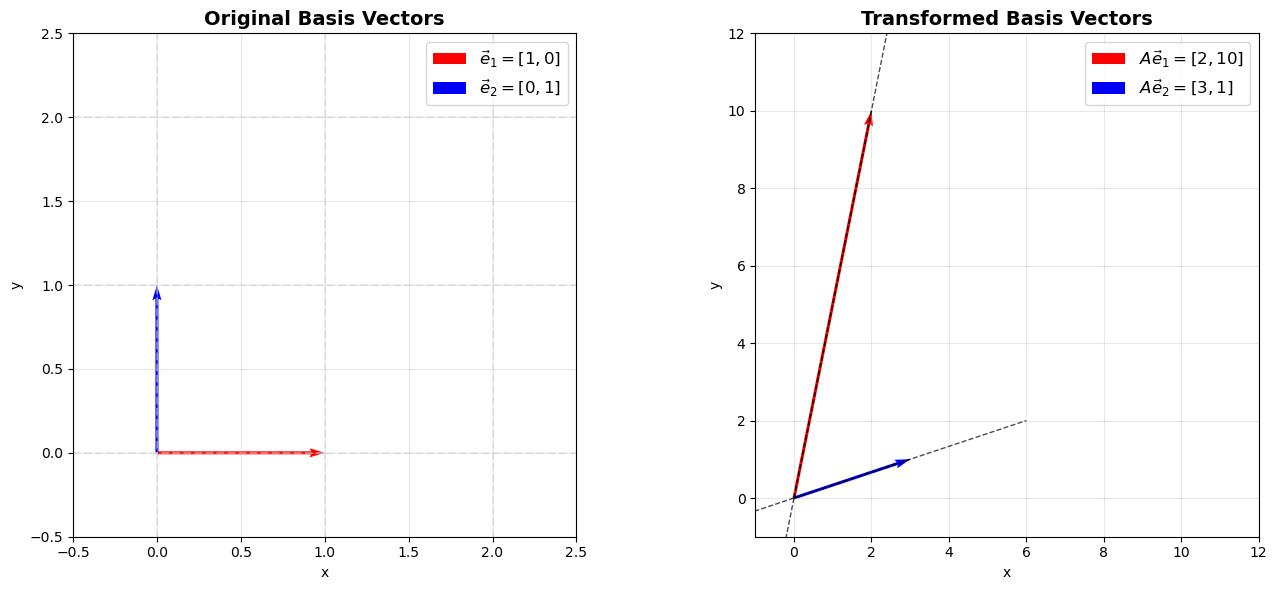

Observation: The transformation preserves the origin (0,0) and keeps lines straight!
The area scaling factor (determinant) is: -28.00


In [6]:
# Create a comprehensive visualization of the transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left plot: Original basis vectors
ax1.quiver(0, 0, e1[0], e1[1], angles='xy', scale_units='xy', scale=1, 
           color='red', width=0.006, label='$\\vec{e}_1 = [1, 0]$')
ax1.quiver(0, 0, e2[0], e2[1], angles='xy', scale_units='xy', scale=1, 
           color='blue', width=0.006, label='$\\vec{e}_2 = [0, 1]$')

# Add grid lines to show the coordinate system
for i in range(-1, 3):
    ax1.axhline(y=i, color='lightgray', linestyle='--', alpha=0.5)
    ax1.axvline(x=i, color='lightgray', linestyle='--', alpha=0.5)

ax1.set_xlim(-0.5, 2.5)
ax1.set_ylim(-0.5, 2.5)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=12)
ax1.set_title("Original Basis Vectors", fontsize=14, fontweight='bold')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Right plot: Transformed basis vectors
ax2.quiver(0, 0, Ae1[0], Ae1[1], angles='xy', scale_units='xy', scale=1, 
           color='red', width=0.006, label=f'$A\\vec{{e}}_1 = [{Ae1[0]}, {Ae1[1]}]$')
ax2.quiver(0, 0, Ae2[0], Ae2[1], angles='xy', scale_units='xy', scale=1, 
           color='blue', width=0.006, label=f'$A\\vec{{e}}_2 = [{Ae2[0]}, {Ae2[1]}]$')

# Show how the grid is transformed
for i in range(-1, 3):
    for j in range(-1, 3):
        start_point = np.array([i, j])
        end_point = A @ start_point
        if i == 0 or j == 0:  # Highlight axis lines
            ax2.plot([0, end_point[0]], [0, end_point[1]], 'k--', alpha=0.7, linewidth=1)

ax2.set_xlim(-1, 12)
ax2.set_ylim(-1, 12)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=12)
ax2.set_title("Transformed Basis Vectors", fontsize=14, fontweight='bold')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

print("Observation: The transformation preserves the origin (0,0) and keeps lines straight!")
print(f"The area scaling factor (determinant) is: {np.linalg.det(A):.2f}")


---

## 3. Matrix Transformation of a General Vector

Now comes the beautiful insight: **any vector can be written as a linear combination of basis vectors**.

Let's take a vector $\vec{v} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}$. We can express this as:

$$\vec{v} = 3 \cdot \vec{e}_1 + 2 \cdot \vec{e}_2 = 3 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 2 \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

Since matrix multiplication is **linear**, when we apply transformation A:

$$A\vec{v} = A(3 \cdot \vec{e}_1 + 2 \cdot \vec{e}_2) = 3 \cdot A\vec{e}_1 + 2 \cdot A\vec{e}_2$$

**This is the key insight**: Matrix multiplication takes the linear combination of basis vectors and applies it to the **transformed** basis vectors!

**Practical meaning**: 
- The coordinates [3, 2] tell us "how much" of each basis vector we need
- After transformation, we need the same "amounts" of the **new** basis vectors
- This is why matrix multiplication works the way it does!


In [7]:
# Define our test vector
v = np.array([3, 2])
print(f"Original vector v = {v}")
print()

# Method 1: Direct matrix multiplication
Av = A @ v
print(f"Method 1 - Direct multiplication:")
print(f"A @ v = {Av}")
print()

# Method 2: Manual reconstruction using linear combination
# v = 3*e1 + 2*e2, so A@v = 3*(A@e1) + 2*(A@e2)
reconstructed = 3 * Ae1 + 2 * Ae2
print(f"Method 2 - Linear combination of transformed basis vectors:")
print(f"3 * (A @ e1) + 2 * (A @ e2) = 3 * {Ae1} + 2 * {Ae2}")
print(f"= {3 * Ae1} + {2 * Ae2}")
print(f"= {reconstructed}")
print()

# Verification
print(f"Are they equal? {np.allclose(Av, reconstructed)}")
print()

# Show the computation step by step
print("Step-by-step matrix multiplication:")
print(f"A @ v = [[{A[0,0]}, {A[0,1]}], [{A[1,0]}, {A[1,1]}]] @ [{v[0]}, {v[1]}]")
print(f"     = [{A[0,0]}*{v[0]} + {A[0,1]}*{v[1]}, {A[1,0]}*{v[0]} + {A[1,1]}*{v[1]}]")
print(f"     = [{A[0,0]*v[0] + A[0,1]*v[1]}, {A[1,0]*v[0] + A[1,1]*v[1]}]")
print(f"     = {Av}")

print("\nThis demonstrates that matrix multiplication is fundamentally about")
print("combining transformed basis vectors with the original coordinates!")


Original vector v = [3 2]

Method 1 - Direct multiplication:
A @ v = [12 32]

Method 2 - Linear combination of transformed basis vectors:
3 * (A @ e1) + 2 * (A @ e2) = 3 * [ 2 10] + 2 * [3 1]
= [ 6 30] + [6 2]
= [12 32]

Are they equal? True

Step-by-step matrix multiplication:
A @ v = [[2, 3], [10, 1]] @ [3, 2]
     = [2*3 + 3*2, 10*3 + 1*2]
     = [12, 32]
     = [12 32]

This demonstrates that matrix multiplication is fundamentally about
combining transformed basis vectors with the original coordinates!


---

## 4. Visualizing the Complete Transformation

Let's visualize how our vector $\vec{v} = [3, 2]$ is transformed. We'll show:

1. **Original vector** $\vec{v}$ in the standard coordinate system
2. **Transformed vector** $A\vec{v}$ 
3. **Transformed basis vectors** to show the new coordinate system
4. **Grid transformation** to see how the entire space is affected

This visualization will help us see that the transformation preserves the **relative position** of the vector with respect to the basis vectors.


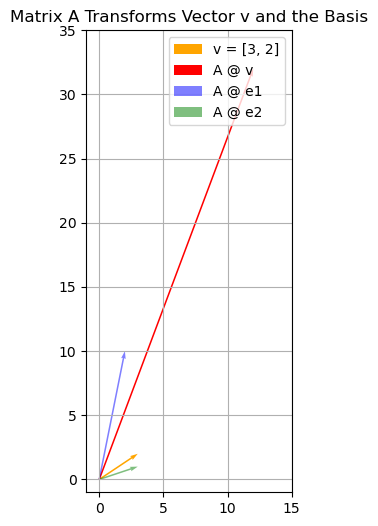

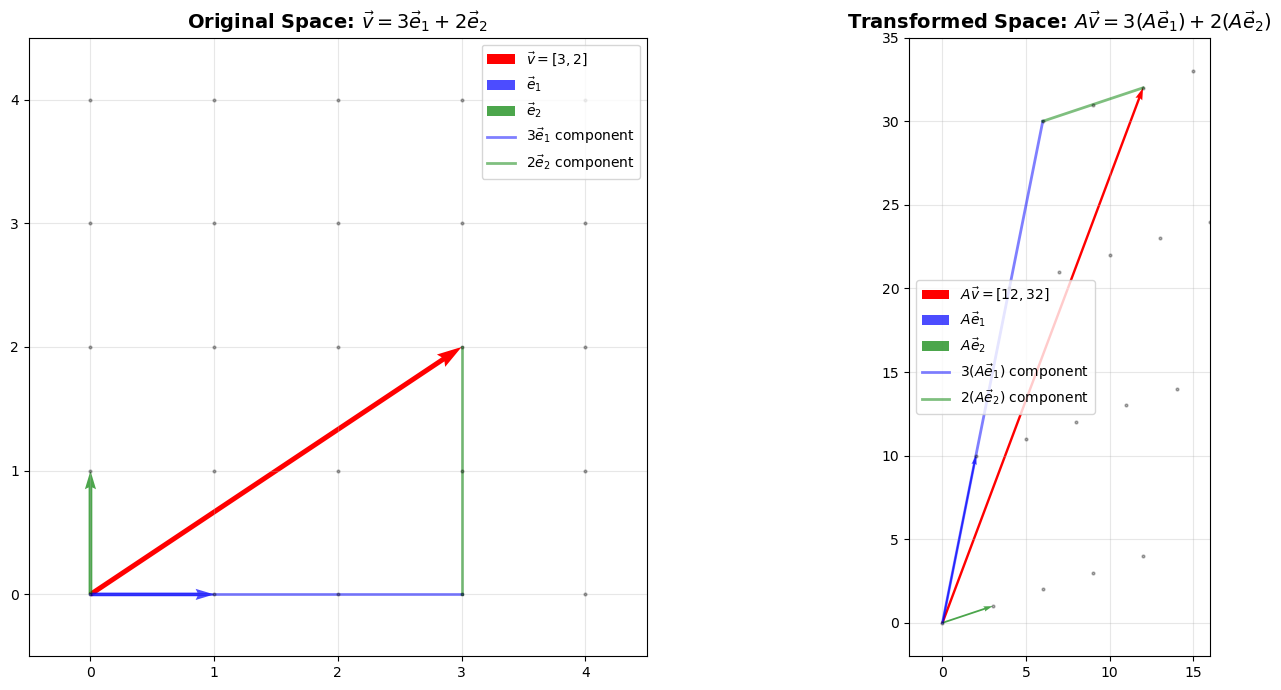

Key Observations:
1. The vector v maintains its relationship to the basis vectors
2. The coordinates [3, 2] remain the same - only the basis changed
3. The grid points show how the entire space is transformed
4. Lines remain straight and parallel lines remain parallel
5. The transformation has determinant -28.0, showing area scaling and orientation flip


In [8]:
# Plot v and its transformed version
plt.figure(figsize=(6, 6))
ax = plt.gca()

# Original and transformed vectors
ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='orange', label='v = [3, 2]')
ax.quiver(0, 0, Av[0], Av[1], angles='xy', scale_units='xy', scale=1, color='red', label='A @ v')

# Transformed basis vectors
ax.quiver(0, 0, Ae1[0], Ae1[1], angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.5, label='A @ e1')
ax.quiver(0, 0, Ae2[0], Ae2[1], angles='xy', scale_units='xy', scale=1, color='green', alpha=0.5, label='A @ e2')

ax.set_xlim(-1, 15)
ax.set_ylim(-1, 35)
ax.set_aspect('equal')
ax.grid(True)
ax.legend()
plt.title("Matrix A Transforms Vector v and the Basis")
plt.show()

# Create a comprehensive side-by-side visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Left plot: Original space
ax1.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, 
           color='red', width=0.008, label=f'$\\vec{{v}} = [{v[0]}, {v[1]}]$')
ax1.quiver(0, 0, e1[0], e1[1], angles='xy', scale_units='xy', scale=1, 
           color='blue', width=0.006, alpha=0.7, label='$\\vec{e}_1$')
ax1.quiver(0, 0, e2[0], e2[1], angles='xy', scale_units='xy', scale=1, 
           color='green', width=0.006, alpha=0.7, label='$\\vec{e}_2$')

# Show the components of vector v
ax1.plot([0, 3], [0, 0], 'blue', alpha=0.5, linewidth=2, label='$3\\vec{e}_1$ component')
ax1.plot([3, 3], [0, 2], 'green', alpha=0.5, linewidth=2, label='$2\\vec{e}_2$ component')

# Grid points
for i in range(5):
    for j in range(5):
        ax1.plot(i, j, 'k.', alpha=0.3, markersize=4)

ax1.set_xlim(-0.5, 4.5)
ax1.set_ylim(-0.5, 4.5)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)
ax1.set_title("Original Space: $\\vec{v} = 3\\vec{e}_1 + 2\\vec{e}_2$", fontsize=14, fontweight='bold')

# Right plot: Transformed space
ax2.quiver(0, 0, Av[0], Av[1], angles='xy', scale_units='xy', scale=1, 
           color='red', width=0.008, label=f'$A\\vec{{v}} = [{Av[0]}, {Av[1]}]$')
ax2.quiver(0, 0, Ae1[0], Ae1[1], angles='xy', scale_units='xy', scale=1, 
           color='blue', width=0.006, alpha=0.7, label='$A\\vec{e}_1$')
ax2.quiver(0, 0, Ae2[0], Ae2[1], angles='xy', scale_units='xy', scale=1, 
           color='green', width=0.006, alpha=0.7, label='$A\\vec{e}_2$')

# Show the components in transformed space
three_Ae1 = 3 * Ae1
two_Ae2 = 2 * Ae2
ax2.plot([0, three_Ae1[0]], [0, three_Ae1[1]], 'blue', alpha=0.5, linewidth=2, 
         label='$3(A\\vec{e}_1)$ component')
ax2.plot([three_Ae1[0], Av[0]], [three_Ae1[1], Av[1]], 'green', alpha=0.5, linewidth=2, 
         label='$2(A\\vec{e}_2)$ component')

# Transformed grid points
for i in range(5):
    for j in range(5):
        transformed_point = A @ np.array([i, j])
        ax2.plot(transformed_point[0], transformed_point[1], 'k.', alpha=0.3, markersize=4)

ax2.set_xlim(-2, 16)
ax2.set_ylim(-2, 35)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10)
ax2.set_title("Transformed Space: $A\\vec{v} = 3(A\\vec{e}_1) + 2(A\\vec{e}_2)$", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("Key Observations:")
print("1. The vector v maintains its relationship to the basis vectors")
print("2. The coordinates [3, 2] remain the same - only the basis changed")
print("3. The grid points show how the entire space is transformed")
print("4. Lines remain straight and parallel lines remain parallel")
print(f"5. The transformation has determinant {np.linalg.det(A):.1f}, showing area scaling and orientation flip")


---

## 5. Properties Preserved by Linear Transformations

Linear transformations (represented by matrices) have special properties that make them "linear":

### ✅ What is PRESERVED:
- **Lines remain lines** (no curves are introduced)
- **Parallel lines remain parallel**
- **The origin (0,0) stays fixed**
- **Ratios along lines are preserved**
- **Linear combinations are preserved**: if $\vec{w} = a\vec{u} + b\vec{v}$, then $A\vec{w} = aA\vec{u} + bA\vec{v}$

### ❌ What can CHANGE:
- **Lengths of vectors** (scaling)
- **Angles between vectors** (shearing)
- **Areas** (by a factor equal to |det(A)|)
- **Orientation** (if det(A) < 0, the space gets "flipped")

---

## 6. Common Types of 2D Linear Transformations

Let's explore some fundamental types of transformations:

- **Scaling**: Changing the size of objects (enlarging or reducing).
- **Rotation**: Turning objects around the origin.
- **Translation**: Shifting objects without changing their shape or orientation.
- **Reflection**: Flipping objects over a line (like a mirror image).
- **Shearing**: Slanting the shape of objects.

Each of these can be represented by a specific matrix, and understanding these helps in grasping more complex transformations.

---

## ✅ Summary

| Concept | Meaning |
|--------|---------|
| Matrix | A rule that transforms space by altering the basis vectors |
| A @ e₁ | Shows where the x-axis (1,0) is sent |
| A @ e₂ | Shows where the y-axis (0,1) is sent |
| A @ v | Linear combination of the transformed basis vectors |
| Preserved | Linearity, parallelism, origin |

Matrix transformations are foundational for:
- Solving systems of equations
- Geometric modeling
- Data transformations
- Deep learning layers and projections

---

Try applying this to other matrices — how does space get stretched, skewed, or flipped?


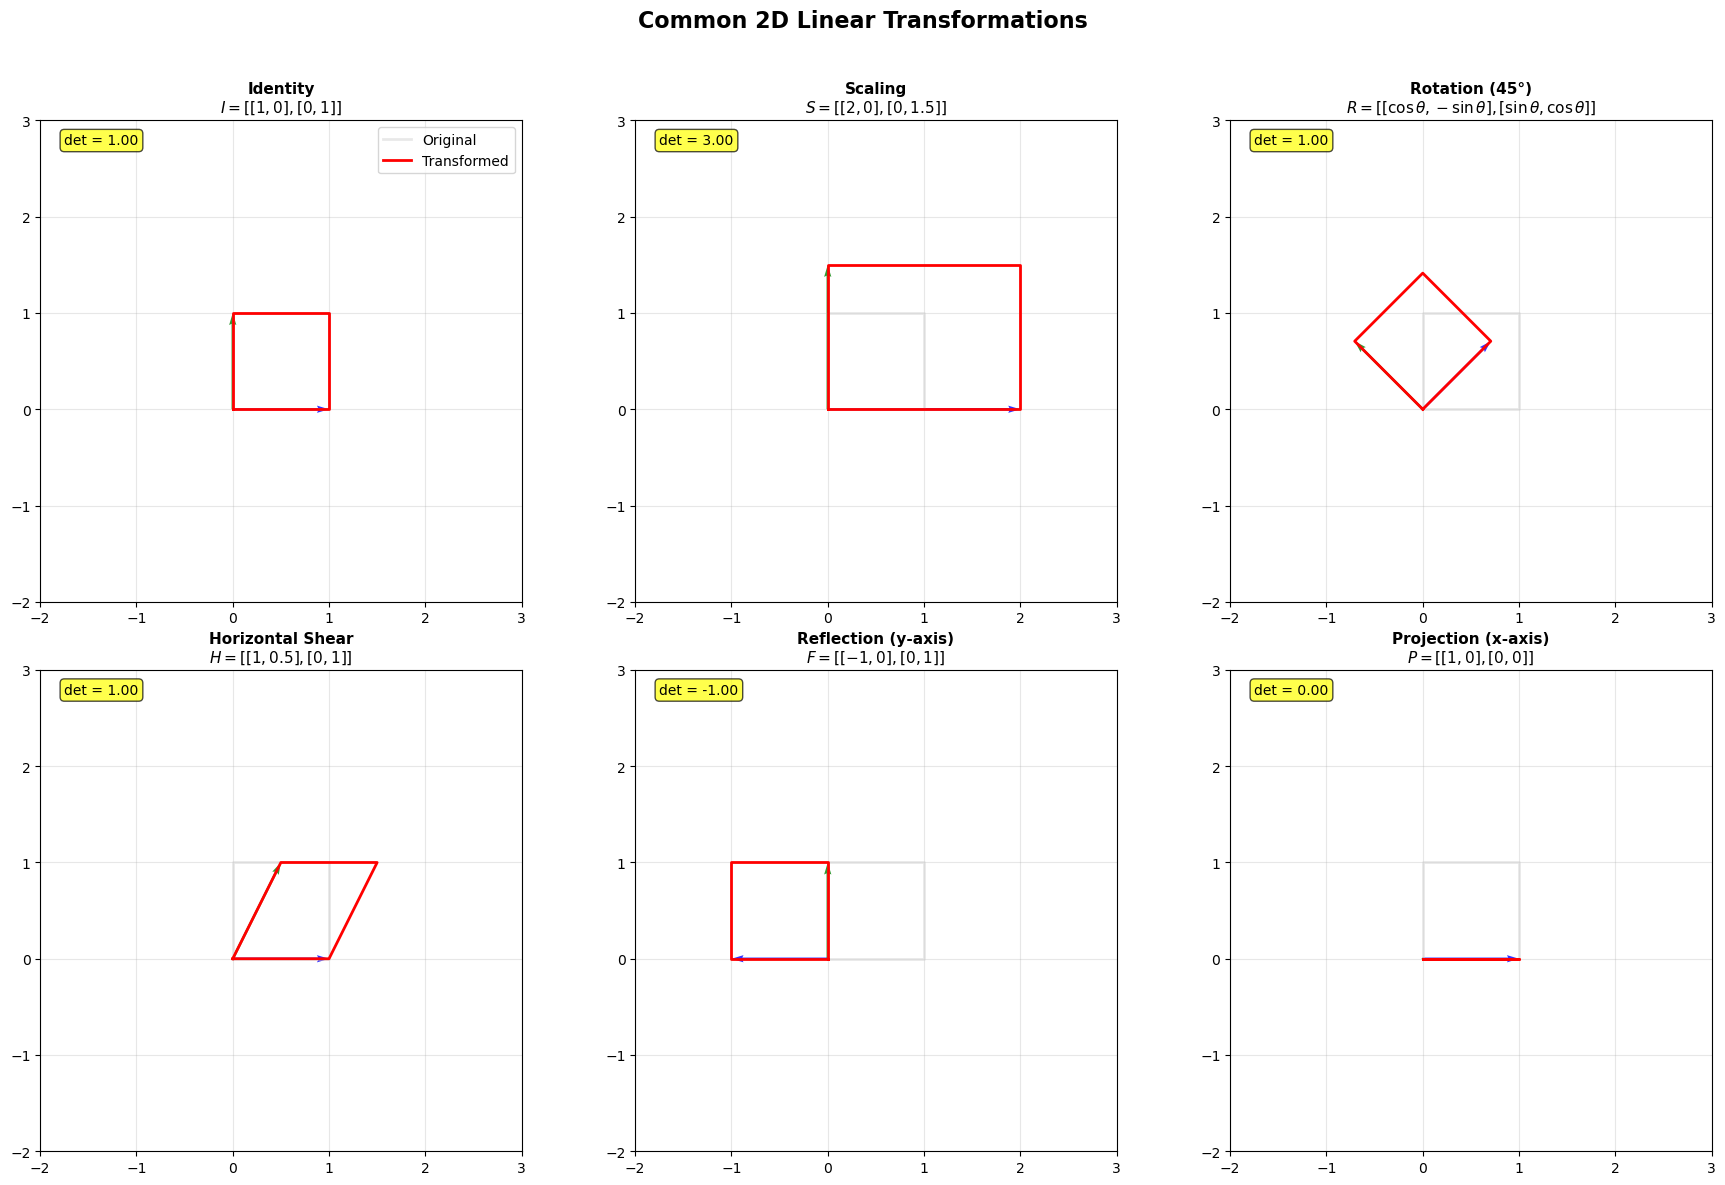

Determinant tells us about area scaling:
• det > 1: Area increases
• det = 1: Area preserved
• 0 < det < 1: Area decreases
• det = 0: Space collapses to lower dimension
• det < 0: Orientation is flipped


In [9]:
# Let's explore different types of common transformations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Original unit square vertices (for visualization)
square = np.array([[0, 1, 1, 0, 0],
                   [0, 0, 1, 1, 0]])

transformations = [
    # 1. Identity (no transformation)
    (np.eye(2), "Identity\n$I = [[1, 0], [0, 1]]$"),
    
    # 2. Scaling
    (np.array([[2, 0], [0, 1.5]]), "Scaling\n$S = [[2, 0], [0, 1.5]]$"),
    
    # 3. Rotation (45 degrees)
    (np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)], 
               [np.sin(np.pi/4), np.cos(np.pi/4)]]), 
     "Rotation (45°)\n$R = [[\\cos\\theta, -\\sin\\theta], [\\sin\\theta, \\cos\\theta]]$"),
    
    # 4. Shear
    (np.array([[1, 0.5], [0, 1]]), "Horizontal Shear\n$H = [[1, 0.5], [0, 1]]$"),
    
    # 5. Reflection (across y-axis)
    (np.array([[-1, 0], [0, 1]]), "Reflection (y-axis)\n$F = [[-1, 0], [0, 1]]$"),
    
    # 6. Projection (onto x-axis)
    (np.array([[1, 0], [0, 0]]), "Projection (x-axis)\n$P = [[1, 0], [0, 0]]$")
]

for i, (matrix, title) in enumerate(transformations):
    ax = axes[i]
    
    # Transform the square
    transformed_square = matrix @ square
    
    # Transform basis vectors
    transformed_e1 = matrix @ e1
    transformed_e2 = matrix @ e2
    
    # Plot original square (light gray)
    ax.plot(square[0], square[1], 'lightgray', linewidth=2, alpha=0.5, label='Original')
    
    # Plot transformed square
    ax.plot(transformed_square[0], transformed_square[1], 'red', linewidth=2, label='Transformed')
    
    # Plot basis vectors
    ax.quiver(0, 0, transformed_e1[0], transformed_e1[1], angles='xy', scale_units='xy', scale=1, 
              color='blue', width=0.005, alpha=0.8)
    ax.quiver(0, 0, transformed_e2[0], transformed_e2[1], angles='xy', scale_units='xy', scale=1, 
              color='green', width=0.005, alpha=0.8)
    
    # Set limits and formatting
    ax.set_xlim(-2, 3)
    ax.set_ylim(-2, 3)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title(title, fontsize=11, fontweight='bold')
    
    # Add determinant info
    det_val = np.linalg.det(matrix)
    ax.text(0.05, 0.95, f'det = {det_val:.2f}', transform=ax.transAxes, 
            bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    if i == 0:
        ax.legend()

plt.suptitle("Common 2D Linear Transformations", fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("Determinant tells us about area scaling:")
print("• det > 1: Area increases")
print("• det = 1: Area preserved") 
print("• 0 < det < 1: Area decreases")
print("• det = 0: Space collapses to lower dimension")
print("• det < 0: Orientation is flipped")

---

## ✅ Key Takeaways

| Concept | Mathematical Form | Geometric Meaning |
|---------|------------------|-------------------|
| **Matrix as Transformation** | $A: \mathbb{R}^n \rightarrow \mathbb{R}^m$ | Mapping from one space to another |
| **Basis Vector Images** | $A\vec{e}_1, A\vec{e}_2, \ldots$ | Where the coordinate axes go |
| **Linear Combination Preservation** | $A(c_1\vec{v}_1 + c_2\vec{v}_2) = c_1A\vec{v}_1 + c_2A\vec{v}_2$ | Maintains proportional relationships |
| **Matrix Columns** | $A = [A\vec{e}_1 \mid A\vec{e}_2 \mid \cdots]$ | Transformed basis vectors |
| **Determinant** | $\det(A)$ | Area/volume scaling factor |

---

## 🔗 Connections to Machine Learning

Understanding matrix transformations is fundamental to many ML concepts:

### 1. **Feature Engineering**
- **Scaling/Normalization**: Diagonal matrices scale features to similar ranges
- **PCA (Principal Component Analysis)**: Finds optimal coordinate system for data
- **Whitening**: Transforms data to have unit covariance

### 2. **Neural Networks**
- **Linear Layers**: Each layer applies $\vec{y} = W\vec{x} + \vec{b}$ (affine transformation)
- **Weight Matrices**: Learn optimal transformations for tasks
- **Activation Functions**: Add non-linearity between linear transformations

### 3. **Computer Vision**
- **Image Transformations**: Rotation, scaling, skewing for data augmentation
- **Convolution**: Special type of linear transformation with weight sharing
- **Geometric Deep Learning**: Understanding transformations in feature space

### 4. **Dimensionality Reduction**
- **Linear Methods**: PCA, LDA use matrix transformations to project to lower dimensions
- **Manifold Learning**: Understanding how high-dimensional data transforms

---

## 🎯 Next Steps

1. **Practice**: Apply different transformation matrices to vectors and visualize results
2. **Experiment**: Try 3×3 matrices for 3D transformations
3. **Explore**: Look into eigenvalues and eigenvectors (directions that don't change under transformation)
4. **Apply**: Use these concepts in PCA or understanding neural network weight matrices

**Remember**: Every time you see matrix multiplication in machine learning, think "What transformation is this performing on my data?"